In [1]:
import os

In [92]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [93]:
c_data=pd.read_csv('diabetic_data.csv')
c_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [94]:
num_of_classes = len(c_data.readmitted.unique())
print(num_of_classes)
c_data.describe()

3


,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [95]:
print((c_data.astype(str) != '?').all(axis=0))

encounter_id                 True
patient_nbr                  True
race                        False
gender                       True
age                          True
weight                      False
admission_type_id            True
discharge_disposition_id     True
admission_source_id          True
time_in_hospital             True
payer_code                  False
medical_specialty           False
num_lab_procedures           True
num_procedures               True
num_medications              True
number_outpatient            True
number_emergency             True
number_inpatient             True
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses             True
max_glu_serum                True
A1Cresult                    True
metformin                    True
repaglinide                  True
nateglinide                  True
chlorpropamide               True
glimepiride                  True
acetohexamide 

In [96]:
c_data["weight"].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [97]:
c_data.shape

(101766, 50)

In [98]:
c_data.drop("weight",axis=1,inplace=True)
# c_data['weight'].replace(["?"],['NaN'],inplace=True)

In [99]:
# numerical_features = [feature for feature in c_data.columns if c_data[feature].dtypes != 'O']

# print('Number of numerical variables: ', len(numerical_features))

In [100]:
# discrete_feature=[feature for feature in numerical_features if len(c_data[feature].unique())<25]
# print("Discrete Variables Count: {}".format(len(discrete_feature)))

In [101]:
# discrete_feature

In [102]:
# features_nan=[feature for feature in c_data.columns if c_data[feature].isnull().sum()>1 and c_data[feature].dtypes=='O']

# for feature in features_nan:
#     print("{}: {}% missing values".format(feature,np.round(c_data[feature].isnull().mean(),4)))

In [103]:
c_data.shape

(101766, 49)

In [104]:
c_data["age"].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [105]:
c_data['age'].replace(["[70-80)","[60-70)","[50-60)","[80-90)","[40-50)", "[30-40)", "[90-100)","[20-30)", "[10-20)", "[0-10)" ],[70,60,50,80,40,30,90,20,10,0],inplace=True)
c_data['age'] = c_data['age'].astype(int)
c_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,0,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,10,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,20,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,30,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,40,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,70,1,3,7,3,MC,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,80,1,4,5,5,MC,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,70,1,1,7,1,MC,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,80,2,3,7,10,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [106]:
c_data["race"].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [107]:
c_data['race'].replace(["?"],['Caucasian'],inplace=True)
c_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,0,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,10,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,20,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,30,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,40,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,70,1,3,7,3,MC,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,80,1,4,5,5,MC,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,70,1,1,7,1,MC,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,80,2,3,7,10,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [108]:
c_data["gender"].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [109]:
c_data['gender'].replace(["Unknown/Invalid"],['Female'],inplace=True)
c_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,0,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,10,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,20,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,30,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,40,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,70,1,3,7,3,MC,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,80,1,4,5,5,MC,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,70,1,1,7,1,MC,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,80,2,3,7,10,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [110]:
c_data["medical_specialty"].value_counts()

?                         49949
InternalMedicine          14635
Emergency/Trauma           7565
Family/GeneralPractice     7440
Cardiology                 5352
                          ...  
SportsMedicine                1
Proctology                    1
Neurophysiology               1
Speech                        1
Perinatology                  1
Name: medical_specialty, Length: 73, dtype: int64

In [111]:
c_data.drop("medical_specialty",axis=1,inplace=True)

In [112]:
c_data["payer_code"].value_counts()

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [113]:
c_data.drop("payer_code",axis=1,inplace=True)

In [114]:
c_data["diag_1"].value_counts()

428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
216       1
347       1
V43       1
817       1
471       1
Name: diag_1, Length: 717, dtype: int64

In [115]:
c_data['diag_1'].replace(["?"],[428],inplace=True)

In [116]:
c_data["diag_2"].value_counts()

276       6752
428       6662
250       6071
427       5036
401       3736
          ... 
893          1
130          1
523          1
754          1
250.31       1
Name: diag_2, Length: 749, dtype: int64

In [117]:
c_data['diag_2'].replace(["?"],[276],inplace=True)

In [118]:
c_data["diag_3"].value_counts()

250     11555
401      8289
276      5175
428      4577
427      3955
        ...  
E966        1
732         1
944         1
524         1
485         1
Name: diag_3, Length: 790, dtype: int64

In [119]:
c_data['diag_3'].replace(["?"],[250],inplace=True)

In [120]:
print((c_data.astype(str) != '?').all(axis=0))

encounter_id                True
patient_nbr                 True
race                        True
gender                      True
age                         True
admission_type_id           True
discharge_disposition_id    True
admission_source_id         True
time_in_hospital            True
num_lab_procedures          True
num_procedures              True
num_medications             True
number_outpatient           True
number_emergency            True
number_inpatient            True
diag_1                      True
diag_2                      True
diag_3                      True
number_diagnoses            True
max_glu_serum               True
A1Cresult                   True
metformin                   True
repaglinide                 True
nateglinide                 True
chlorpropamide              True
glimepiride                 True
acetohexamide               True
glipizide                   True
glyburide                   True
tolbutamide                 True
pioglitazo

In [121]:
c_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,0,6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,10,1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,20,1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,30,1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,40,1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,70,1,3,7,3,51,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,80,1,4,5,5,33,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,70,1,1,7,1,53,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,80,2,3,7,10,45,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [122]:
c_data.drop("encounter_id",axis=1,inplace=True)

In [123]:
c_data.drop("patient_nbr",axis=1,inplace=True)

In [124]:
c_data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [125]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null int32
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
diag_1                      101766 non-null object
diag_2                      101766 non-null object
diag_3                      101766 non-null object
number_diagnoses            101766 non-null int64
max_glu_serum               101766

In [126]:
le=LabelEncoder()
c_data['race']=le.fit_transform(c_data['race'])
c_data['gender']=le.fit_transform(c_data['gender'])
c_data['max_glu_serum']=le.fit_transform(c_data['max_glu_serum'])
c_data['A1Cresult']=le.fit_transform(c_data['A1Cresult'])
c_data['metformin']=le.fit_transform(c_data['metformin'])
c_data['repaglinide']=le.fit_transform(c_data['repaglinide'])
c_data['nateglinide']=le.fit_transform(c_data['nateglinide'])
c_data['chlorpropamide']=le.fit_transform(c_data['chlorpropamide'])
c_data['glimepiride']=le.fit_transform(c_data['glimepiride'])
c_data['acetohexamide']=le.fit_transform(c_data['acetohexamide'])
c_data['glipizide']=le.fit_transform(c_data['glipizide'])
c_data['glyburide']=le.fit_transform(c_data['glyburide'])
c_data['tolbutamide']=le.fit_transform(c_data['tolbutamide'])
c_data['pioglitazone']=le.fit_transform(c_data['pioglitazone'])
c_data['rosiglitazone']=le.fit_transform(c_data['rosiglitazone'])
c_data['acarbose']=le.fit_transform(c_data['acarbose'])
c_data['miglitol']=le.fit_transform(c_data['miglitol'])
c_data['troglitazone']=le.fit_transform(c_data['troglitazone'])
c_data['tolazamide']=le.fit_transform(c_data['tolazamide'])
c_data['examide']=le.fit_transform(c_data['examide'])
c_data['citoglipton']=le.fit_transform(c_data['citoglipton'])
c_data['insulin']=le.fit_transform(c_data['insulin'])
c_data['glyburide-metformin']=le.fit_transform(c_data['glyburide-metformin'])
c_data['glipizide-metformin']=le.fit_transform(c_data['glipizide-metformin'])
c_data['glimepiride-pioglitazone']=le.fit_transform(c_data['glimepiride-pioglitazone'])
c_data['metformin-rosiglitazone']=le.fit_transform(c_data['metformin-rosiglitazone'])
c_data['metformin-pioglitazone']=le.fit_transform(c_data['metformin-pioglitazone'])
c_data['change']=le.fit_transform(c_data['change'])
c_data['diabetesMed']=le.fit_transform(c_data['diabetesMed'])
#c_data['readmitted']=le.fit_transform(c_data['readmitted'])
c_data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,0,6,25,1,1,41,0,1,...,0,1,1,0,0,0,0,1,0,NO
1,2,0,10,1,1,7,3,59,0,18,...,0,3,1,0,0,0,0,0,1,>30
2,0,0,20,1,1,7,2,11,5,13,...,0,1,1,0,0,0,0,1,1,NO
3,2,1,30,1,1,7,2,44,1,16,...,0,3,1,0,0,0,0,0,1,NO
4,2,1,40,1,1,7,1,51,0,8,...,0,2,1,0,0,0,0,0,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,70,1,3,7,3,51,0,16,...,0,0,1,0,0,0,0,0,1,>30
101762,0,0,80,1,4,5,5,33,3,18,...,0,2,1,0,0,0,0,1,1,NO
101763,2,1,70,1,1,7,1,53,0,9,...,0,0,1,0,0,0,0,0,1,NO
101764,2,0,80,2,3,7,10,45,2,21,...,0,3,1,0,0,0,0,0,1,NO


In [127]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
race                        101766 non-null int32
gender                      101766 non-null int32
age                         101766 non-null int32
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
diag_1                      101766 non-null object
diag_2                      101766 non-null object
diag_3                      101766 non-null object
number_diagnoses            101766 non-null int64
max_glu_serum               101766 n

In [128]:
c_data=c_data.drop(['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','race','num_procedures','change','diabetesMed','diag_1','diag_2','diag_3'],axis=1)
c_data

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,insulin,readmitted
0,0,0,6,25,1,1,41,1,0,0,0,1,2,2,1,NO
1,0,10,1,1,7,3,59,18,0,0,0,9,2,2,3,>30
2,0,20,1,1,7,2,11,13,2,0,1,6,2,2,1,NO
3,1,30,1,1,7,2,44,16,0,0,0,7,2,2,3,NO
4,1,40,1,1,7,1,51,8,0,0,0,5,2,2,2,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,70,1,3,7,3,51,16,0,0,0,9,2,1,0,>30
101762,0,80,1,4,5,5,33,18,0,0,1,9,2,2,2,NO
101763,1,70,1,1,7,1,53,9,1,0,0,13,2,2,0,NO
101764,0,80,2,3,7,10,45,21,0,0,1,9,2,2,3,NO


In [129]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
embarked_readmitted = c_data['readmitted']
embarked_encoded = label_encoder.fit_transform(embarked_readmitted)
embarked_encoded[0:100]

array([2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [130]:
from sklearn.preprocessing import OneHotEncoder
readmitted_encoder = OneHotEncoder(categories='auto')
embarked_1hot = readmitted_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_1hot_mat = embarked_1hot.toarray()
embarked_DF = pd.DataFrame(embarked_1hot_mat, columns = ['L', 'G', 'No'])
embarked_DF[0:200]

,L,G,No
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
195,0.0,1.0,0.0
196,0.0,0.0,1.0
197,1.0,0.0,0.0
198,0.0,0.0,1.0


In [131]:
c_data.drop(['readmitted'], axis=1, inplace=True)
c_data.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,insulin
0,0,0,6,25,1,1,41,1,0,0,0,1,2,2,1
1,0,10,1,1,7,3,59,18,0,0,0,9,2,2,3
2,0,20,1,1,7,2,11,13,2,0,1,6,2,2,1
3,1,30,1,1,7,2,44,16,0,0,0,7,2,2,3
4,1,40,1,1,7,1,51,8,0,0,0,5,2,2,2


In [132]:
c_data_dmy = pd.concat([c_data, embarked_DF], axis=1, verify_integrity=True).astype(float)
c_data_dmy[0:5]

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,insulin,L,G,No
0,0.0,0.0,6.0,25.0,1.0,1.0,41.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,1.0
1,0.0,10.0,1.0,1.0,7.0,3.0,59.0,18.0,0.0,0.0,0.0,9.0,2.0,2.0,3.0,0.0,1.0,0.0
2,0.0,20.0,1.0,1.0,7.0,2.0,11.0,13.0,2.0,0.0,1.0,6.0,2.0,2.0,1.0,0.0,0.0,1.0
3,1.0,30.0,1.0,1.0,7.0,2.0,44.0,16.0,0.0,0.0,0.0,7.0,2.0,2.0,3.0,0.0,0.0,1.0
4,1.0,40.0,1.0,1.0,7.0,1.0,51.0,8.0,0.0,0.0,0.0,5.0,2.0,2.0,2.0,0.0,0.0,1.0


In [133]:
c_data_dmy.corr()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,insulin,L,G,No
gender,1.000000,-0.050584,0.014623,-0.020946,-0.003822,-0.029890,-0.003049,-0.022030,-0.011448,-0.021058,-0.014585,-0.003320,0.001394,-0.019336,0.003492,-0.002898,-0.016886,0.017980
age,-0.050584,1.000000,-0.007209,0.114323,0.044696,0.107515,0.020770,0.041847,0.023724,-0.087291,-0.042861,0.242597,0.001577,0.063811,-0.023173,0.017634,0.020142,-0.030403
admission_type_id,0.014623,-0.007209,1.000000,0.083483,0.106654,-0.012500,-0.143713,0.079535,0.026511,-0.019116,-0.038161,-0.117126,-0.096403,0.006661,-0.007858,-0.011651,0.002548,0.004923
discharge_disposition_id,-0.020946,0.114323,0.083483,1.000000,0.018193,0.162748,0.023415,0.108753,-0.008715,-0.024471,0.020787,0.046891,-0.019237,0.007024,-0.022845,0.050560,-0.048922,0.014852
admission_source_id,-0.003822,0.044696,0.106654,0.018193,1.000000,-0.006965,0.048885,-0.054533,0.027244,0.059892,0.036314,0.072114,-0.092762,-0.002364,-0.010920,0.005820,0.037964,-0.039986
time_in_hospital,-0.029890,0.107515,-0.012500,0.162748,-0.006965,1.000000,0.318450,0.466135,-0.008916,-0.009681,0.073623,0.220186,-0.035803,-0.025605,0.045957,0.044199,0.024434,-0.051289
num_lab_procedures,-0.003049,0.020770,-0.143713,0.023415,0.048885,0.318450,1.000000,0.268161,-0.007602,-0.002279,0.039231,0.152773,0.013058,-0.115914,0.035507,0.020364,0.027592,-0.039253
num_medications,-0.022030,0.041847,0.079535,0.108753,-0.054533,0.466135,0.268161,1.000000,0.045197,0.013180,0.064194,0.261526,-0.027324,-0.010510,0.077152,0.038432,0.023521,-0.046772
number_outpatient,-0.011448,0.023724,0.026511,-0.008715,0.027244,-0.008916,-0.007602,0.045197,1.000000,0.091459,0.107338,0.094152,-0.010517,0.003391,0.013360,0.018893,0.073406,-0.082142
number_emergency,-0.021058,-0.087291,-0.019116,-0.024471,0.059892,-0.009681,-0.002279,0.013180,0.091459,1.000000,0.266559,0.055539,-0.013158,0.007820,0.018101,0.060747,0.067584,-0.103011


In [134]:
c_data_dmy.cov()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,insulin,L,G,No
gender,0.248588,-0.402036,0.010538,-0.055142,-0.007743,-0.044486,-0.029906,-0.089273,-0.007233,-0.009769,-0.009183,-0.003201,0.000215,-0.004993,0.001461,-0.000455,-0.004014,0.004469
age,-0.402036,254.110306,-0.166093,9.622598,2.895651,5.116110,6.514106,5.421710,0.479257,-1.294738,-0.862831,7.477632,0.007793,0.526823,-0.309854,0.088513,0.153070,-0.241583
admission_type_id,0.010538,-0.166093,2.089189,0.637141,0.626511,-0.053932,-4.086834,0.934345,0.048560,-0.025709,-0.069657,-0.327347,-0.043185,0.004987,-0.009527,-0.005303,0.001756,0.003547
discharge_disposition_id,-0.055142,9.622598,0.637141,27.880148,0.390398,2.565205,2.432424,4.667127,-0.058316,-0.120228,0.138614,0.478744,-0.031479,0.019208,-0.101179,0.084061,-0.123151,0.039090
admission_source_id,-0.007743,2.895651,0.626511,0.390398,16.516753,-0.084501,3.908732,-1.801288,0.140316,0.226482,0.186378,0.566697,-0.116838,-0.004976,-0.037226,0.007447,0.073557,-0.081004
time_in_hospital,-0.044486,5.116110,-0.053932,2.565205,-0.084501,8.910868,18.702608,11.309219,-0.033728,-0.026889,0.277541,1.270916,-0.033123,-0.039587,0.115073,0.041545,0.034773,-0.076317
num_lab_procedures,-0.029906,6.514106,-4.086834,2.432424,3.908732,18.702608,387.080530,42.880139,-0.189544,-0.041729,0.974736,5.811858,0.079620,-1.181126,0.585963,0.126151,0.258806,-0.384958
num_medications,-0.089273,5.421710,0.934345,4.667127,-1.801288,11.309219,42.880139,66.057332,0.465523,0.099673,0.658892,4.110004,-0.068828,-0.044239,0.525973,0.098353,0.091137,-0.189490
number_outpatient,-0.007233,0.479257,0.048560,-0.058316,0.140316,-0.033728,-0.189544,0.465523,1.605961,0.107844,0.171782,0.230709,-0.004131,0.002226,0.014202,0.007539,0.044349,-0.051888
number_emergency,-0.009769,-1.294738,-0.025709,-0.120228,0.226482,-0.026889,-0.041729,0.099673,0.107844,0.865779,0.313223,0.099923,-0.003794,0.003769,0.014127,0.017798,0.029980,-0.047778


In [135]:
c_data_dmy.describe()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,insulin,L,G,No
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,0.462384,60.967022,2.024006,3.715642,5.754437,4.395987,43.095641,16.021844,0.369357,0.197836,0.635566,7.422607,1.983914,1.893383,1.405469,0.111599,0.349282,0.539119
std,0.498586,15.940838,1.445403,5.280166,4.064081,2.985108,19.674362,8.127566,1.267265,0.930472,1.262863,1.933600,0.309922,0.517917,0.838798,0.314874,0.476745,0.498470
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,50.000000,1.000000,1.000000,1.000000,2.000000,31.000000,10.000000,0.000000,0.000000,0.000000,6.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,60.000000,1.000000,1.000000,7.000000,4.000000,44.000000,15.000000,0.000000,0.000000,0.000000,8.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,70.000000,3.000000,4.000000,7.000000,6.000000,57.000000,20.000000,0.000000,0.000000,1.000000,9.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000
max,1.000000,90.000000,8.000000,28.000000,25.000000,14.000000,132.000000,81.000000,42.000000,76.000000,21.000000,16.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252159D84C8>,
      dtype=object)

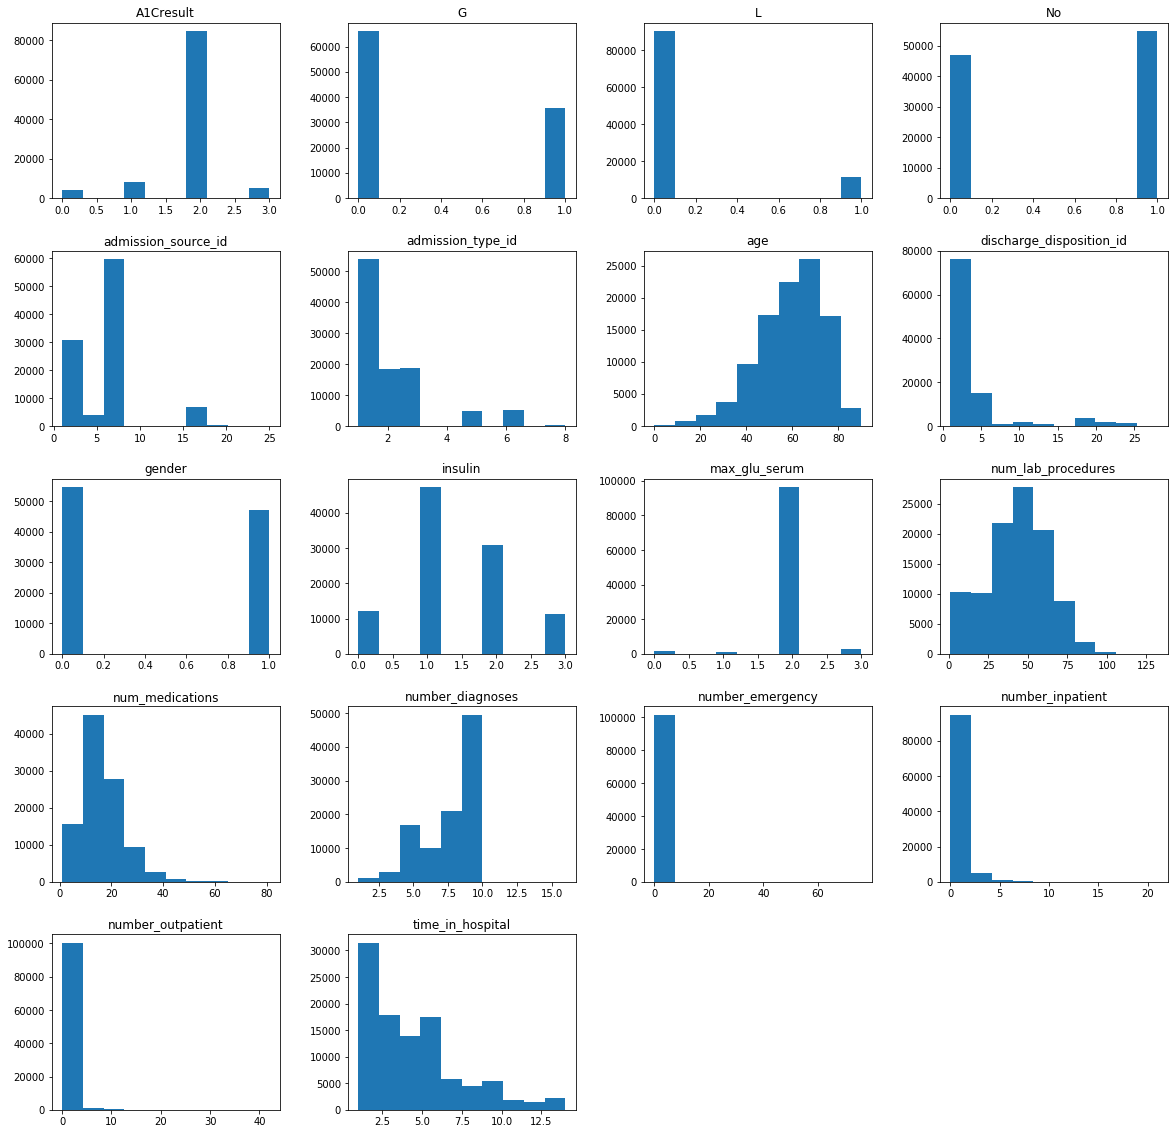

In [89]:
c_data_dmy.hist(bins=10, figsize=(20,20),grid=False)

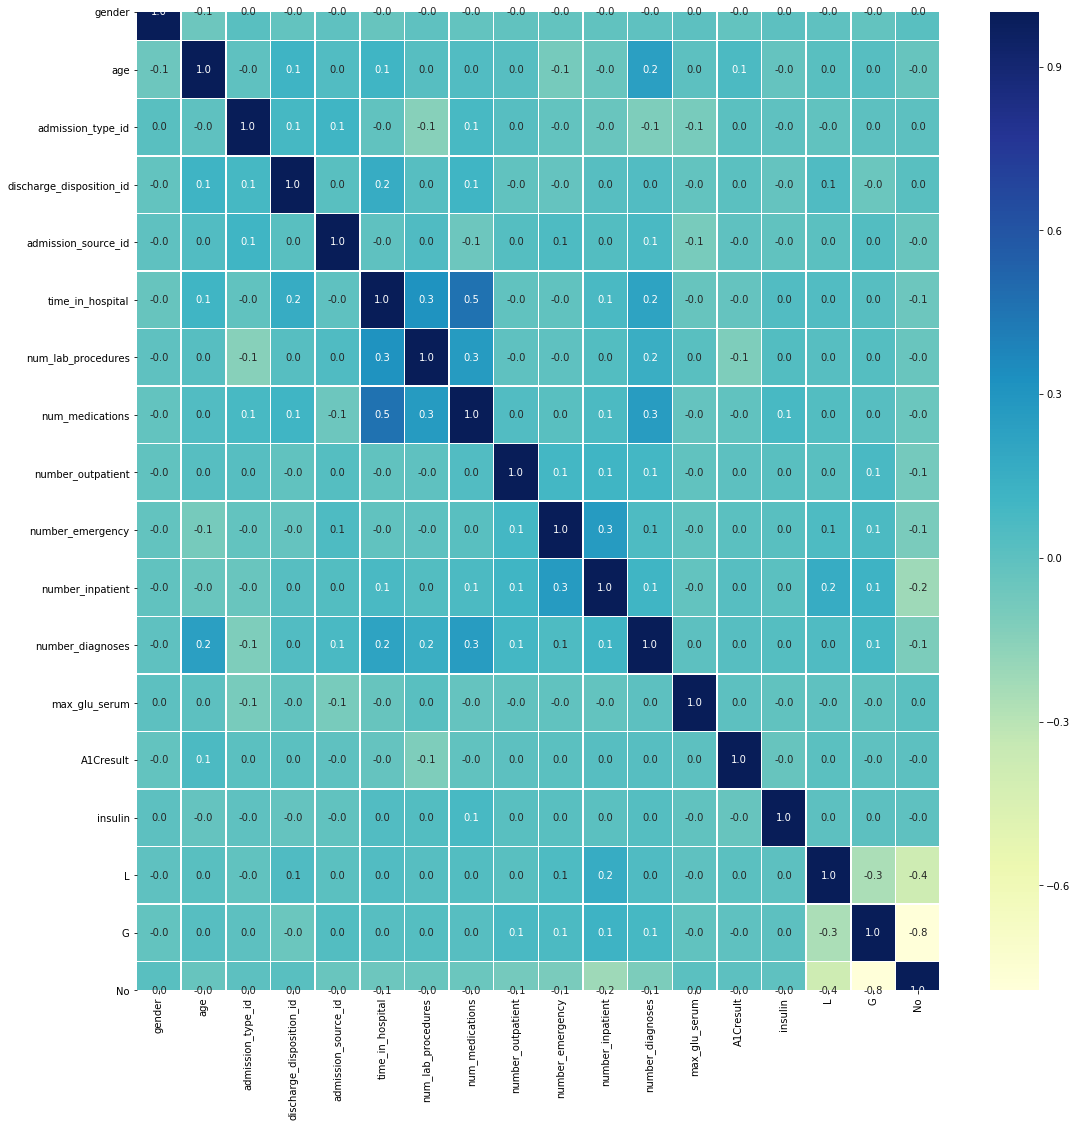

In [43]:
corr = c_data_dmy.corr()
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu")

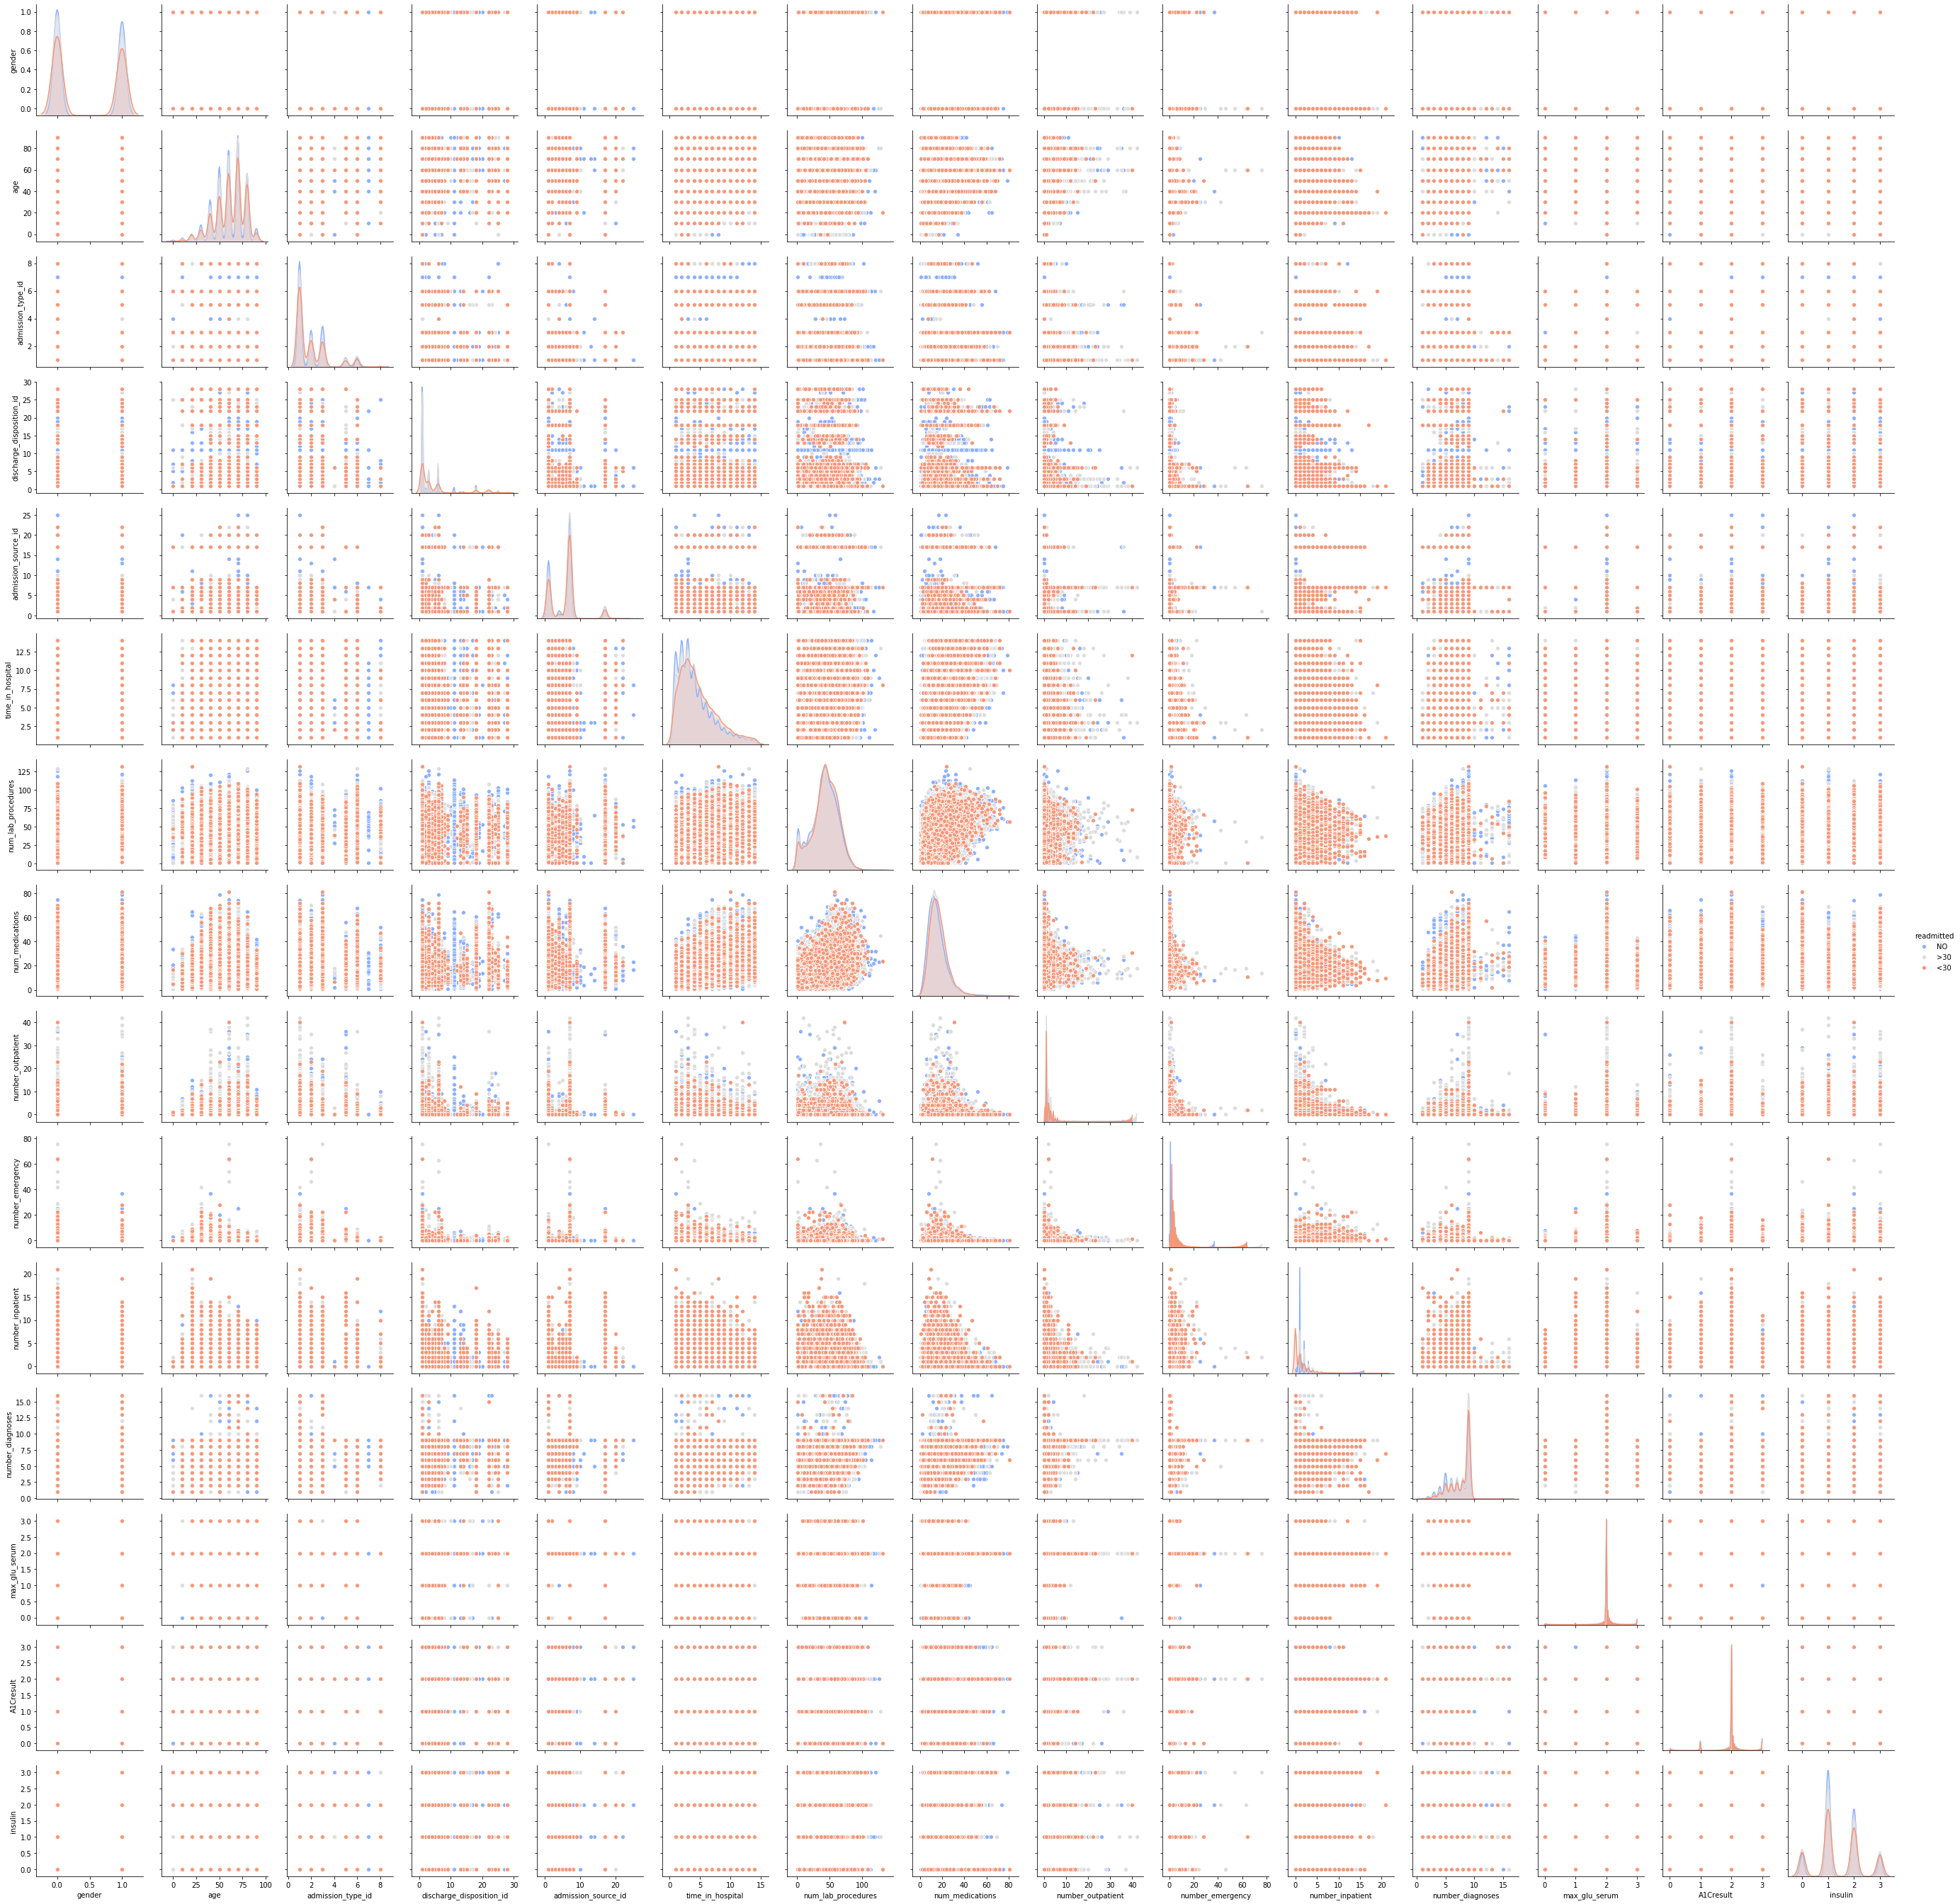

In [80]:
import seaborn as sns
sns.pairplot(c_data, hue='readmitted', palette='coolwarm')

In [136]:
x = c_data_dmy.iloc[:,:-3]
x

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,insulin
0,0.0,0.0,6.0,25.0,1.0,1.0,41.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0
1,0.0,10.0,1.0,1.0,7.0,3.0,59.0,18.0,0.0,0.0,0.0,9.0,2.0,2.0,3.0
2,0.0,20.0,1.0,1.0,7.0,2.0,11.0,13.0,2.0,0.0,1.0,6.0,2.0,2.0,1.0
3,1.0,30.0,1.0,1.0,7.0,2.0,44.0,16.0,0.0,0.0,0.0,7.0,2.0,2.0,3.0
4,1.0,40.0,1.0,1.0,7.0,1.0,51.0,8.0,0.0,0.0,0.0,5.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1.0,70.0,1.0,3.0,7.0,3.0,51.0,16.0,0.0,0.0,0.0,9.0,2.0,1.0,0.0
101762,0.0,80.0,1.0,4.0,5.0,5.0,33.0,18.0,0.0,0.0,1.0,9.0,2.0,2.0,2.0
101763,1.0,70.0,1.0,1.0,7.0,1.0,53.0,9.0,1.0,0.0,0.0,13.0,2.0,2.0,0.0
101764,0.0,80.0,2.0,3.0,7.0,10.0,45.0,21.0,0.0,0.0,1.0,9.0,2.0,2.0,3.0


In [139]:
y= c_data_dmy.iloc[:,-3]
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
101761    0.0
101762    0.0
101763    0.0
101764    0.0
101765    0.0
Name: L, Length: 101766, dtype: float64

In [140]:
#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [141]:
x_train.shape

(71236, 15)

In [142]:
y_train
y_train = y_train.astype('int')
y_train

37848    1
7493     0
76550    0
28781    0
35231    0
        ..
82584    1
87016    0
49166    0
96370    0
24559    0
Name: L, Length: 71236, dtype: int32

In [143]:
y_test = y_test.astype('int')
y_test

60628     1
854       0
98063     0
85799     0
74843     0
         ..
43308     0
17998     0
11566     0
65917     0
100071    0
Name: L, Length: 30530, dtype: int32

In [144]:
#Perform feature scaling to fit and transform the training data using the StandardScaler function
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)

In [145]:
x_test

array([[-0.92843398, -0.68800265, -0.01721716, ...,  0.04923966,
         0.20548953,  1.9004513 ],
       [-0.92843398,  0.56862996, -0.01721716, ...,  0.04923966,
         0.20548953,  0.70953882],
       [-0.92843398, -0.05968634, -0.01721716, ...,  0.04923966,
         2.14048654,  1.9004513 ],
       ...,
       [ 1.07708251, -0.05968634,  0.6749282 , ...,  0.04923966,
         0.20548953, -0.48137366],
       [ 1.07708251,  0.56862996, -0.01721716, ...,  0.04923966,
         0.20548953, -0.48137366],
       [-0.92843398, -0.05968634, -0.70936252, ...,  0.04923966,
         0.20548953,  0.70953882]])

In [146]:
x_train

array([[ 1.07708251,  0.56862996,  0.6749282 , ...,  0.04923966,
         0.20548953,  0.70953882],
       [-0.92843398, -0.05968634, -0.70936252, ...,  0.04923966,
        -1.72950747,  1.9004513 ],
       [-0.92843398,  1.19694626,  2.75136429, ...,  0.04923966,
         0.20548953, -0.48137366],
       ...,
       [-0.92843398, -0.68800265, -0.70936252, ...,  0.04923966,
         0.20548953, -0.48137366],
       [-0.92843398,  1.82526257, -0.70936252, ...,  0.04923966,
         0.20548953, -0.48137366],
       [-0.92843398,  0.56862996, -0.01721716, ...,  0.04923966,
         0.20548953,  0.70953882]])

In [147]:
from xgboost import XGBClassifier
xgb = XGBClassifier(booster='gbtree', objective='multi:softprob', random_state=140, eval_metric="auc", num_class=num_of_classes)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=3, objective='multi:softprob',
              random_state=140, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [148]:
#Apply model on Test dataset
#Use ROC AUC as the evluation metric
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

# Use trained model to predict output of test dataset
val = xgb.predict(x_test)

lb = preprocessing.LabelBinarizer()
lb.fit(y_test)

y_test_lb = lb.transform(y_test)
val_lb = lb.transform(val)

roc_auc_score(y_test_lb, val_lb, average='macro')

0.503544493779444

In [149]:
# Visually compare output
output = pd.DataFrame()
output['Expected Output'] = y_test
output['Predicted Output'] = val
#output.head()
output

,Expected Output,Predicted Output
60628,1,0
854,0,0
98063,0,0
85799,0,0
74843,0,0
...,...,...
43308,0,0
17998,0,0
11566,0,0
65917,0,0


# KNearest Neighbors

In [166]:
from sklearn import model_selection, neighbors

In [167]:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [168]:
y_pred=clf.predict(x_test)

In [169]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [170]:
#confusion_matrix to accept the model or reject the model.
#Build confusion matrix on Test and Train
from sklearn.metrics import confusion_matrix
clf_cm_test = confusion_matrix(y_test,y_pred)
clf_cm_test

array([[26713,   446],
       [ 3218,   153]], dtype=int64)

In [171]:
#Obtain accuracy
accuracy = clf.score(x_test,y_test)

In [172]:
print(accuracy)

0.8799868981329839


In [173]:
#Predict the probability of each test data point
#Get the probability distribution
probas = clf.predict_proba(x_test)

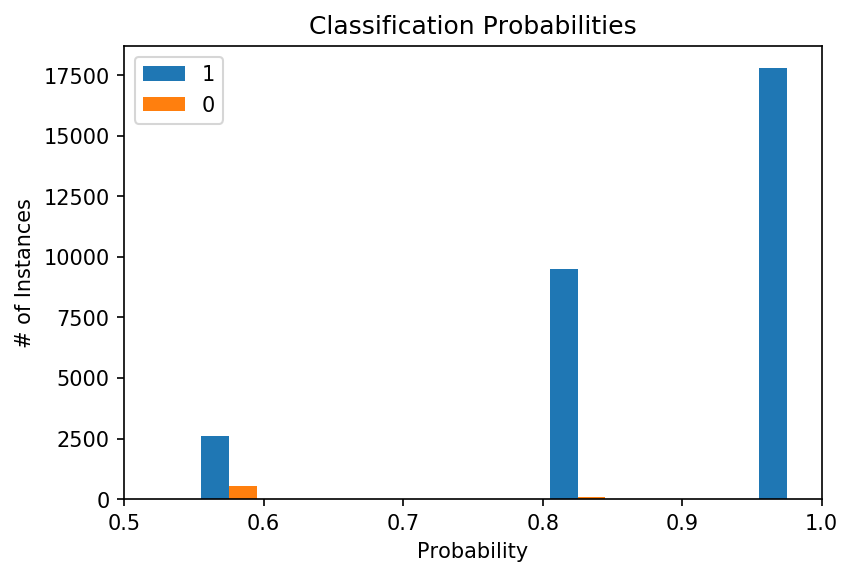

In [174]:
#Visualize the probabilities
# plot
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.legend(y_test)
plt.show()

In [175]:
# Create ROC curve for the model
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs =clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

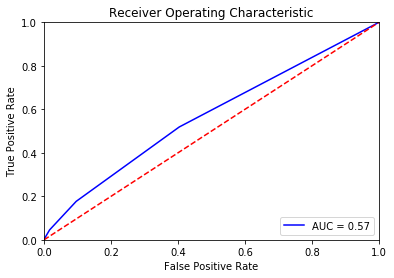

In [176]:
# PLOT ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [177]:
#Test new data
example_measures=np.array([1,50,0,0,4,4,5,60,10,0,0,1,5,2,2,])
example_measures = example_measures.reshape(1,-1)

In [178]:
prediction = clf.predict(example_measures)

In [180]:
print(prediction)

[0]


# Logistic Regression

In [181]:
#Perform Logistic Regression
from sklearn.linear_model.logistic import LogisticRegression
cls =LogisticRegression(random_state =120)
lr_cls=cls.fit(x_train, y_train)

C:\Users\AbhilashMandadhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [182]:
#Predicting on test and train data
lr_y_test =lr_cls.predict(x_test)
lr_y_test

array([0, 0, 0, ..., 0, 0, 0])

In [183]:
lr_y_train = lr_cls.predict(x_train)
lr_y_train

array([0, 0, 0, ..., 0, 0, 0])

In [184]:
# from sklearn.metrics import classification_report 
# print(classification_report(y_test, lr_y_test))

In [185]:
#Build confusion matrix on Test and Train
from sklearn.metrics import confusion_matrix
lr_cm_test = confusion_matrix(y_test, lr_y_test)
lr_cm_test

array([[27086,    73],
       [ 3323,    48]], dtype=int64)

In [186]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score
lr_accu_test= accuracy_score(y_test,lr_y_test)
lr_accu_test

0.8887651490337373

In [187]:
lr_accu_train= accuracy_score(y_train,lr_y_train)  #train 98--rs=50  
lr_accu_train

0.8879639508113875

In [188]:
#Precision score on Test and Train
from sklearn.metrics import precision_score
#recall_score
lr_precision_test =precision_score(y_test, lr_y_test, average='weighted')  
print(lr_precision_test)
lr_precision_train =precision_score(y_train, lr_y_train, average='weighted')
print(lr_precision_train)

0.8361744510162905
0.8467772822063285


In [189]:
# Create ROC curve for the model
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs =cls.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

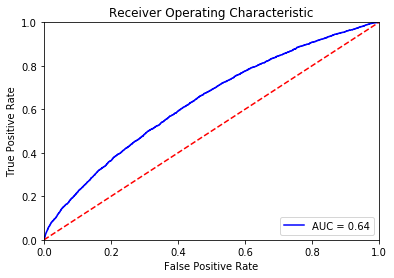

In [190]:
# PLOT ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Naive Bayes Classification

In [191]:
#Perform Naibe Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb_classfier =GaussianNB()
nb_classfier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [192]:
#Predicting on Test and Train
nb_y_test = nb_classfier.predict(x_test)  #for test
nb_y_test

array([0, 0, 0, ..., 0, 0, 0])

In [193]:
nb_y_train=nb_classfier.predict(x_train)#for train
nb_y_train

array([0, 0, 0, ..., 0, 0, 0])

In [194]:
#Build confusion matrix on Test and Train
from sklearn.metrics import confusion_matrix
nb_cm_test = confusion_matrix(y_test,nb_y_test)
nb_cm_test

array([[25785,  1374],
       [ 2917,   454]], dtype=int64)

In [195]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score
nb_acc_test=accuracy_score(y_test, nb_y_test)
nb_acc_test

0.859449721585326

In [196]:
nb_acc_train=accuracy_score(y_train, nb_y_train)  #train  
nb_acc_train

0.8606041888932562

In [197]:
#Precision score on Test and Train
from sklearn.metrics import precision_score

nb_precision_test =precision_score(y_test, nb_y_test, average='weighted')  
print(nb_precision_test)
nb_precision_train =precision_score(y_train, nb_y_train, average='weighted')
print(nb_precision_train)

0.8265978925797752
0.8268463322486888


In [198]:
# Create ROC curve for the model
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs =nb_classfier.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

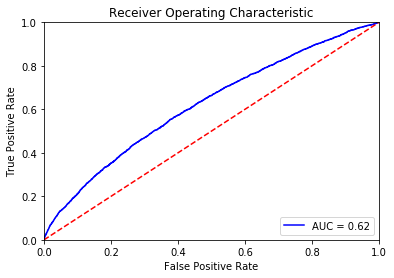

In [199]:
# PLOT ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Support Vector

In [200]:
#Support Vector Classification
from sklearn.svm import SVC
#sc =SVC(random_state =0)
sc = SVC(kernel='rbf')
sc_classifier = sc.fit(x_train,y_train)  #model building 

In [201]:
#Predicting on Test and Train data
svc_y_test = sc_classifier.predict(x_test)
print(svc_y_test)

[0 0 0 ... 0 0 0]


In [202]:
svc_y_train=sc_classifier.predict(x_train)  #train
print(svc_y_train)

[0 0 0 ... 0 0 0]


In [203]:
#Build confusion matrix on test and train
from sklearn.metrics import confusion_matrix
svc_cm_test = confusion_matrix(y_test,svc_y_test)   
svc_cm_test

array([[27139,    20],
       [ 3349,    22]], dtype=int64)

In [204]:
svc_cm_train =confusion_matrix(y_train, svc_y_train)
svc_cm_train

array([[63230,    20],
       [ 7880,   106]], dtype=int64)

In [205]:
#Accuracy classsification score
from sklearn.metrics import accuracy_score
svc_acc_test=accuracy_score(y_test, svc_y_test)  #for test  
svc_acc_test

0.8896495250573206

In [206]:
svc_acc_train= accuracy_score(y_train, svc_y_train)  #for train  
svc_acc_train

0.8891010163400528

In [207]:
#Precision score on Test and Train
from sklearn.metrics import precision_score
sv_precision_test= precision_score(y_test, svc_y_test, average='weighted')  
print(sv_precision_test)
sv_precision_train=precision_score(y_train, svc_y_train, average='weighted')
print(sv_precision_train)

0.849703271969092
0.8838140941624144


# #Decision Tree Classifier

In [208]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier(max_depth = 10, random_state=101, max_features = None, min_samples_leaf = 15)
dtc_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [209]:
#Predicting on test and train data
dtc_y_test =dtc_clf.predict(x_test)
dtc_y_test

array([0, 0, 0, ..., 0, 0, 0])

In [210]:
dtc_y_train = dtc_clf.predict(x_train)
dtc_y_train

array([0, 0, 0, ..., 0, 0, 0])

In [211]:
#Build confusion matrix on Test and Train
from sklearn.metrics import confusion_matrix
dtc_cm_test = confusion_matrix(y_test, dtc_y_test)
dtc_cm_test

array([[26955,   204],
       [ 3253,   118]], dtype=int64)

In [212]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score
dtc_accu_test= accuracy_score(y_test,dtc_y_test)
dtc_accu_test

0.8867671143137897

In [213]:
dtc_accu_train= accuracy_score(y_train,dtc_y_train)    
dtc_accu_train

0.8906451794036723

In [214]:
#Precision score on Test and Train
from sklearn.metrics import precision_score
    
dtc_precision_test =precision_score(y_test, dtc_y_test, average='weighted')  
print(dtc_precision_test)
dtc_precision_train =precision_score(y_train, dtc_y_train, average='weighted')
print(dtc_precision_train)

0.834250644245727
0.8635677450878612


In [215]:
# Create ROC curve for the model
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = dtc_clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

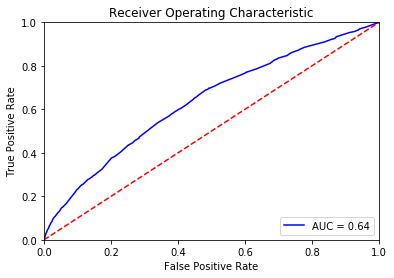

In [216]:
# PLOT ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest

In [217]:
#Build Random Forest Calssifier
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3, random_state=0)
rf_classi = rmf.fit(x_train, y_train)

C:\Users\AbhilashMandadhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [218]:
#Predicting on test and train data
rf_y_test = rf_classi.predict(x_test)
rf_y_test

array([0, 0, 0, ..., 0, 0, 0])

In [219]:
rf_y_train = rf_classi.predict(x_train)
rf_y_train

array([0, 0, 0, ..., 0, 0, 0])

In [220]:
#Build Confusion Matrix on Test and Train
from sklearn.metrics import confusion_matrix
rf_cm_test = confusion_matrix(y_test, rf_y_test)
rf_cm_test

array([[27159,     0],
       [ 3371,     0]], dtype=int64)

In [221]:
rf_cm_train = confusion_matrix(y_train, rf_y_train)
rf_cm_train

array([[63250,     0],
       [ 7986,     0]], dtype=int64)

In [222]:
#Accuracy Score on Test and Train
from sklearn.metrics import accuracy_score
rf_accu_test= accuracy_score(y_test,rf_y_test)  #test
rf_accu_test

0.8895840157222404

In [223]:
rf_accu_train= accuracy_score(y_train,rf_y_train)  
rf_accu_train

0.887893761581223

In [224]:
#Precision Score on Test and Train
from sklearn.metrics import precision_score
rf_precision_test =precision_score(y_test, rf_y_test, average='weighted')  
print(rf_precision_test)  #test data
rf_precision_train =precision_score(y_train, rf_y_train, average='weighted')
print(rf_precision_train) #train data

0.7913597210285073
0.7883553318548537


C:\Users\AbhilashMandadhi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [225]:
# Create ROC curve for the model
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = rmf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

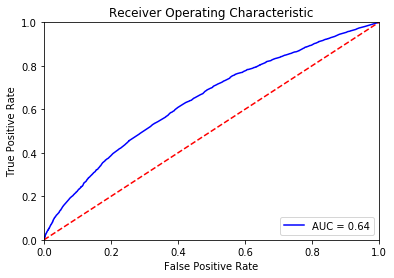

In [226]:
# PLOT ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Perform AdaBoost

In [227]:
#Perform AdaBoost
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)

In [228]:
print(results)

[0.89261651 0.88629983 0.89163391 0.8888265  0.88250983 0.88517687
 0.89119753 0.88572231 0.88895128 0.88572231]


In [229]:
print(results.mean())

0.8878656877236066
